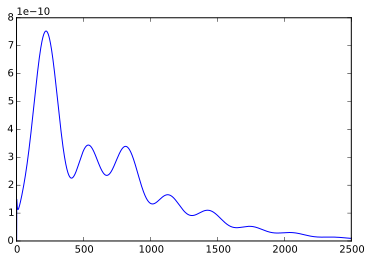

In [5]:
#Exercise 0: example
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
cosmo = Class()
cosmo.set({'output':'tCl, pCl, lCl'})

cosmo.compute()
cl = cosmo.raw_cl()

#print cl
l = cl['ell']
plt.plot(l, l*(l+1)/(2.*np.pi)*cl['tt'])

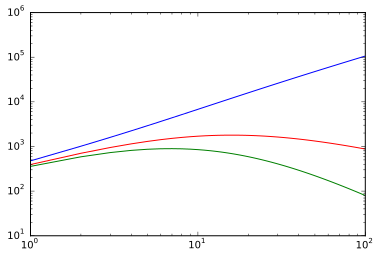

In [20]:
#Exercise 1: Distances
luminosity_distance=[]
angular_distance=[]
comoving_distance=[]
z=[]
for i in range(0, 100, 1):
    #print z
    luminosity_distance.append(cosmo.luminosity_distance(i/10.))
    angular_distance.append(cosmo.angular_distance(i/10.))
    z.append(i)
    comoving_distance.append(cosmo.angular_distance(i/10.)/(1+i/10.))
#print luminosity_distance

#comoving_distance=angular_distance/(1. + z)
plt.figure()
plt.loglog(z, luminosity_distance, 'b-')
plt.loglog(z, angular_distance, 'r-')
plt.loglog(z, comoving_distance, 'g-')

In [30]:
#Exercise 2: Chaotic Inflation
#We need to plot the scalar power spectrum and the tensor power spectrum
inflation_setup=Class()
inflation_setup.set({'output':'tCl','modes':'s,t','P_k_ini type':'inflation_V_end',
                     'Vparam0':0,'Vparam1':0,'Vparam2':1.6e-12,'Vparam3':0,'Vparam4':0,
                     'ln_aH_ratio':55,'primordial_verbose':2})
inflation_setup.compute()
spectra=inflation_setup.get_primordial()
#print spectra

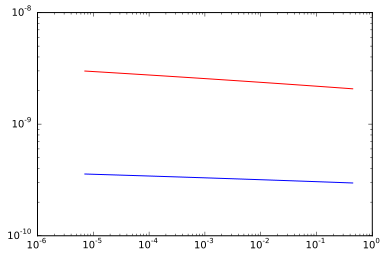

In [31]:
plt.figure()
plt.loglog(spectra['k [1/Mpc]'], spectra['P_scalar(k)'], 'r-')
plt.loglog(spectra['k [1/Mpc]'], spectra['P_tensor(k)'], 'b-')

In [56]:
print "This is n_s={}".format(inflation_setup.n_s())
print "This is A_s={}".format(inflation_setup.get_current_derived_parameters(['A_s'])['A_s'])
print "This is alpha_s={}".format(inflation_setup.get_current_derived_parameters(['alpha_s'])['alpha_s'])
print "This is r={}".format(inflation_setup.get_current_derived_parameters(['r'])['r'])




This is n_s=0.964987262914
This is A_s=2.24208696208e-09
This is alpha_s=-0.000608897434545
This is r=0.137830640698


In [73]:
#Exercise 3: Transfer. Reproduce the following plot from Ue-Li Pe
transfer={}
masses = [0.05, 0.1, 0.2, 0.4]
redshifts = [0, 10, 100, 1020]
A_s = 2.24208696208e-09
n_s = 0.964987262914

In [76]:
for m in masses:
    transfer[m]=Class()
    transfer[m].set({'output':'dTk, vTk, mPk','N_ncdm':1,'m_ncdm':m,'z_pk':'1050,0.0',
                 'P_k_max_h/Mpc':10, 'A_s': A_s,'n_s': n_s})
    transfer[m].compute()
#print transfer : this is a dictionary with 4 models

In [63]:
#For over the redshifst and over the masses

for z in redshifts:
    
    


True

In [ ]:

zvec = [0, 10, 100, 1020]
fig, axes = plt.subplots(2,2,sharex=True,figsize=(7,5))
flataxes = axes.flat
for iz, z in enumerate(zvec):
    ax = flataxes[iz]
    
    for m in masses:
        tk = cosmo[m].get_transfer(z)
        #print tk.keys()
        k = tk['k (h/Mpc)']*cosmo[m].h()
        prim = A_s*(k/0.05)**(n_s-1.)
        ax.semilogx(tk['k (h/Mpc)'],prim*tk['t_ncdm[0]']**2/k**2*(3e5)**2)
    ax.set_xlim([2e-3,10])
    ax.text(0.05, 0.85,r'$z='+str(z)+'$', horizontalalignment='left',transform=ax.transAxes)
axes[1,1].legend(loc='upper right',fontsize=10)
axes[1,0].set_ylim([0,1600])
axes[1,1].set_ylim([0,800])
#fig.tight_layout()
#fig.subplots_adjust(hspace=0.1)